### 한국어 코퍼스 전처리
- 데이터셋: Korpora에서 로딩
- 형태소 분석기 설정
- 단어사전 생성

#### [1] 모듈 로딩 및 데이터 준비<hr>

In [1]:
## 모듈 로딩

# ----------------------------------------------
# 자연어 처리 관련 모듈
from Korpora import Korpora				# open korean Dataset
from konlpy.tag import *				# 형태소 분석기

import spacy							# 형태소 분석기
# ----------------------------------------------

# ----------------------------------------------
# Pytorch 자연어 처리 관련 모듈
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import *					# 단어사전 관련 모듈
from torch.utils.data import Dataset, DataLoader
# ----------------------------------------------

# ----------------------------------------------
# 그외 모듈
import pandas as pd


c:\Users\KDP-43\anaconda3\envs\TEXT_018_230_38\lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\KDP-43\anaconda3\envs\TEXT_018_230_38\lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\KDP-43\anaconda3\envs\TEXT_018_230_38\lib\site-packages\torchtext\utils.py:4: UserWarning:

In [2]:
## 데이터 로딩
nsmc = Korpora.load("nsmc")


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `nsmc` is already installed at C:\Users\KDP-43\Korpora\nsmc\ratings_train.txt
[Korpora] Corpus `nsmc` is already installed at C:\Users\KD

In [3]:
nsmc.train[0], nsmc.test[1]

(LabeledSentence(text='아 더빙.. 진짜 짜증나네요 목소리', label=0),
 LabeledSentence(text='GDNTOPCLASSINTHECLUB', label=0))

In [4]:
# Test 데이터셋을 DF으로 로딩
nsmcDF = pd.DataFrame(nsmc.test)
nsmcDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


#### [2]커스텀 데이터셋 정의 <hr>

In [5]:
# -----------------------------------------------------
# 클래스 목적: 단어 사전 생성 시 활용

# -----------------------------------------------------

In [6]:
class TextDataset(Dataset):
    
	def __init__(self, feature, label):
		self.feature = feature
		self.label = label
		self.length = feature.shape[0]

	def __len__(self):
		return self.length

	def __getitem__(self, index):
		return self.feature.iloc[index], self.label.iloc[index]
		# 이걸 받아서 토큰화

In [7]:
## NSMC 데이터셋 인스턴스 생성
nsmcDS = TextDataset(nsmcDF['text'], nsmcDF['label'])

for feature, label in nsmcDS:
    print(feature, label)
    break

굳 ㅋ 1


In [15]:
len(nsmcDF['text'])

50000

In [8]:
len(nsmcDS)

50000

#### [3] 텍스트 데이터 전처리 <hr>
- 토큰화, 정제 (불용어, 구두점, 오타 등등)
- 단어사전 생성
- 문장 ==> 수치화

In [9]:
def preprocessing(text):
    
	# 불용어 제거
    pass

In [10]:
## 토커나이저 생성
Okt_tokenizer = get_tokenizer(Okt().morphs)
spacy_tokenizer = get_tokenizer('spacy', language='ko_core_news_sm')

##### [3_2]반복자 함수 생성
- 텍스트 Dataset에서 처리할 데이터셋만 로딩 & 토큰화 진행

In [11]:
def generateToken(dataset):
    for text, label in dataset:
        
		# 불용어 처리
        # tokens = Okt_tokenizer(text)
        
		# 불용어 처리 후 데이터 토큰화
        yield Okt_tokenizer(text)



In [12]:
## 단어 사전 생성
# special = ['<UNK>', '<PAD>']
UNK_TOKEN = '<UNK>'
PAD_TOKEN = '<PAD>'
nsmcVocab = build_vocab_from_iterator(iterator=generateToken(nsmcDS), 
                                      specials=[UNK_TOKEN])



In [16]:
len(nsmcVocab)

56813

In [ ]:
nsmcVocab.set_default_index(nsmcVocab[UNK_TOKEN])

In [13]:


# nsmcVocab.set_default_index(nsmcVocab[[UNK_TOKEN,PAD_TOKEN]])

TypeError: __getitem__(): incompatible function arguments. The following argument types are supported:
    1. (self: torchtext._torchtext.Vocab, arg0: str) -> int

Invoked with: <torchtext._torchtext.Vocab object at 0x00000224D8C00830>, ['<UNK>', '<PAD>']

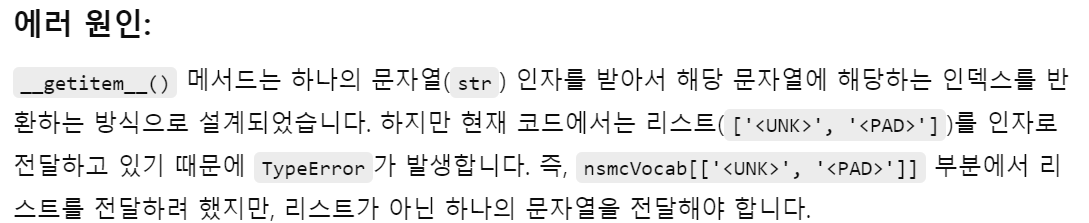

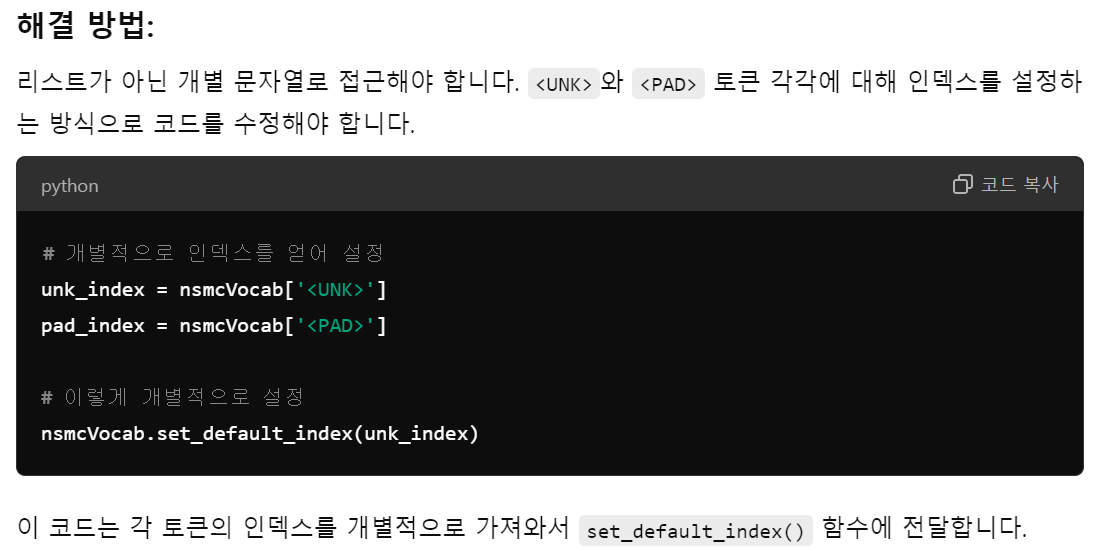

In [17]:
unk_index = nsmcVocab[UNK_TOKEN]
pad_index = nsmcVocab[PAD_TOKEN]

nsmcVocab = build_vocab_from_iterator(iterator=generateToken(nsmcDS), 
                                      specials=[UNK_TOKEN, PAD_TOKEN])


In [19]:
# 개별 단어사전 ???
# nsmcVocab.set_default_index(unk_index)
nsmcVocab.set_default_index(pad_index)